In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

# os.chdir('/content/drive/MyDrive/신입기수 프로젝트/Dataset')
os.chdir('C:/Users/sjkan/Desktop/연세/YBIGTA/22 여름방학/신입기수프로젝트')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러오기

In [25]:
data = pd.read_csv('rawdata.csv')
data

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 행주대교 조위 결측치 처리
###### 변수 이름은 그냥 그대로 gangwha...

In [26]:
gangwha = data[['날짜', '행주대교_유량']]
gangwha

,날짜,행주대교_유량
0,2012-05-01 00:00,540.18
1,2012-05-01 00:10,540.18
2,2012-05-01 00:20,540.18
3,2012-05-01 00:30,552.17
4,2012-05-01 00:40,564.29
...,...,...
276331,2022-07-18 23:10,974.40
276332,2022-07-18 23:20,1006.88
276333,2022-07-18 23:30,1039.90
276334,2022-07-18 23:40,1073.46


In [27]:
gangwha.날짜 = pd.to_datetime(gangwha.날짜)
gangwha

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,날짜,행주대교_유량
0,2012-05-01 00:00:00,540.18
1,2012-05-01 00:10:00,540.18
2,2012-05-01 00:20:00,540.18
3,2012-05-01 00:30:00,552.17
4,2012-05-01 00:40:00,564.29
...,...,...
276331,2022-07-18 23:10:00,974.40
276332,2022-07-18 23:20:00,1006.88
276333,2022-07-18 23:30:00,1039.90
276334,2022-07-18 23:40:00,1073.46


In [28]:
gangwha[gangwha['행주대교_유량'].isnull()]   # 59개의 결측치 : 순서대로 채우기

,날짜,행주대교_유량
140613,2017-06-26 11:30:00,NaN
140614,2017-06-26 11:40:00,NaN
140615,2017-06-26 11:50:00,NaN
140616,2017-06-26 12:00:00,NaN
140617,2017-06-26 12:10:00,NaN
140618,2017-06-26 12:20:00,NaN
140619,2017-06-26 12:30:00,NaN
140620,2017-06-26 12:40:00,NaN
140621,2017-06-26 12:50:00,NaN
140622,2017-06-26 13:00:00,NaN


In [29]:
nan_index = list(gangwha[gangwha['행주대교_유량'].isnull()].index)
nan_index

[140613,
 140614,
 140615,
 140616,
 140617,
 140618,
 140619,
 140620,
 140621,
 140622,
 140623,
 140624,
 140625,
 140626,
 140627,
 140628,
 140629,
 140630,
 140631,
 140632,
 140633,
 140634,
 140635,
 140636,
 140637,
 140638,
 140639,
 140640,
 140641,
 140642,
 140643,
 140644,
 140645,
 140646,
 140647,
 140648,
 140649,
 140650,
 140651,
 140652,
 140653,
 140654,
 140655,
 140656,
 140657,
 140658,
 140659,
 140660,
 140661,
 140662,
 140663,
 140664,
 140665,
 140666,
 140667,
 140668,
 140669,
 140670,
 236080]

In [30]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

if nan_index[-3]+1 != nan_index[-2]:
    index_interpolate.extend(nan_index[-2:])
else:
    index_interpolate.extend(nan_index[-1:])
nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [31]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])
index_interpolate_

[236079, 236080, 236081]

In [32]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [33]:
# 데이터프레임 분리

gangwha_interpolate = gangwha.copy()
gangwha_interpolate = gangwha_interpolate.set_index('날짜')
gangwha_interpolate = gangwha_interpolate.iloc[index_interpolate_, :]
gangwha_interpolate

,행주대교_유량
날짜,
2020-10-15 10:30:00,762.23
2020-10-15 10:40:00,NaN
2020-10-15 10:50:00,734.09


In [34]:
# 보간

gangwha_interpolate.interpolate(method='time', inplace=True)
gangwha_interpolate   # 보간 결과 확인

,행주대교_유량
날짜,
2020-10-15 10:30:00,762.23
2020-10-15 10:40:00,748.16
2020-10-15 10:50:00,734.09


In [35]:
gangwha_interpolate.isnull().sum()

행주대교_유량    0
dtype: int64

In [36]:
gangwha = gangwha.set_index('날짜')
gangwha.loc[gangwha_interpolate.index] = gangwha_interpolate
gangwha.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

행주대교_유량    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [40]:
# !pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

ImportError: ignored

In [ ]:
index_sarima[0]

140613

In [ ]:
gangwha

,행주대교_유량
날짜,
2012-05-01 00:00:00,540.18
2012-05-01 00:10:00,540.18
2012-05-01 00:20:00,540.18
2012-05-01 00:30:00,552.17
2012-05-01 00:40:00,564.29
...,...
2022-07-18 23:10:00,974.40
2022-07-18 23:20:00,1006.88
2022-07-18 23:30:00,1039.90


In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
#temp = index_sarima[-2:]
#print(temp)
total.append(temp)
total[0].append(index_sarima[-2:][0])
total[0].append(index_sarima[-2:][1])
print(total)

[[140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620, 140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628, 140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636, 140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644, 140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652, 140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660, 140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668, 140669, 140670]]


In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
# 전체 다 조위 cycle(28일, 즉 직전 144*28=4032개의 row)을 반영하여 결측치 처리

for range in total:
  start = range[0]
  model = pm.auto_arima(gangwha[start-1000:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))
  print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

1번째 구간 결측치 처리 완료


In [ ]:
# 결측치가 모두 처리되었는지 확인

gangwha.isnull().sum()

행주대교_유량    0
dtype: int64

In [ ]:
gangwha.iloc[140000]

행주대교_유량    652.89
Name: 2017-06-22 05:20:00, dtype: float64

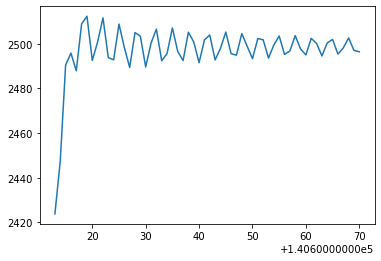

In [ ]:
# 결측치 처리 형태 확인 (첫번째 구간)

plt.plot(total[0], gangwha.iloc[total[0], 0])
plt.show()

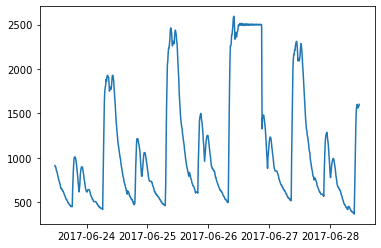

In [ ]:
plt.plot(gangwha['2017-06-23 11:30:00':'2017-06-28 11:30:00'])

In [ ]:
gangwha.to_csv('행주대교 유량_처리완료.csv')